In [1]:
# Step 0 : Environment Setup 
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ricky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Step 1: Load the Dataset
df = pd.read_csv("../data/Reviews.csv")

In [3]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
#Step 2:Pre-processing NLP tasks
def clean_text(text):
    # Function to get NLTK POS tag to WordNet POS tag
    def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN
            
    #convert to lowercase
    text = text.lower()

    #Remove url
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))',' ',text)

    #Replacing @mention with user
    text = re.sub(r'@[\^S]+','User',text)

     #Remove hashtags but keep the text
    text = re.sub(r'#(\S+)', r'\1', text)

    #Remove digits
    text = re.sub(r'\d+','',text)

    #Remove the whitespaces
    text = re.sub(r'\s+',' ',text)

    #Strip leading and trailing whitespaces
    text = text.strip()

    # Remove stopwords using NLTK
    text = " ".join([word for word in text.split() if word not in stop_words])
    
    return text

    # Tokenize text
    tokenizer = RegexpTokenizer(r'\w+|[^\w\s]')
    tokens = tokenizer.tokenize(text)

    # Part-of-Speech (pos)
    pos_tags = nltk.pos_tags(tokens)
    
    # Lemmatize the text (Lemmatization means convert a word to it's root form ) Ex: The leaves are falling swiftly -> ['The','leaf','be','fall','swiftly'] 
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in pos_tags]

    return ' '.join(lemmatized_tokens)
    
    

In [5]:
# CHANGE 1: TRINARY TARGET CREATION
def map_sentiment(score):
    if score <= 2:
        return 0    # Negative
    elif score == 3:
        return 1    # Neutral
    else:
        return 2    # Positive

df['target'] = df['Score'].apply(map_sentiment)

# Preprocess text
df['text'] = df['Text'].apply(clean_text)


In [6]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['target'],
    test_size=0.2,
    random_state=42,
    stratify=df['target']   # 🔧 helps balance all 3 classes
)

In [7]:
# Step 4: Tf-IDF (Term Frequency and Inverse Document Frequency)


In [8]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer( ngram_range=(1, 2))
# Fit and transform the training data
X_train_vect = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vect = vectorizer.transform(X_test)


In [9]:
# Step 5: Model Building and evalution function 

def evaluate_model(model):
    model.fit(X_train_vect, y_train)
    y_pred = model.predict(X_test_vect)

    print(classification_report(
        y_test,
        y_pred,
        target_names=["Negative", "Neutral", "Positive"]
    ))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Neg", "Neu", "Pos"],
                yticklabels=["Neg", "Neu", "Pos"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average="weighted"),
        "recall": recall_score(y_test, y_pred, average="weighted"),
        "f1-score": f1_score(y_test, y_pred, average="weighted")
    }

    return {"logistic_regression": metrics}


C:\Users\ricky\anaconda3\envs\torch_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

    Negative       0.85      0.80      0.82     16407
     Neutral       0.79      0.46      0.58      8528
    Positive       0.93      0.98      0.96     88756

    accuracy                           0.92    113691
   macro avg       0.86      0.75      0.79    113691
weighted avg       0.91      0.92      0.91    113691



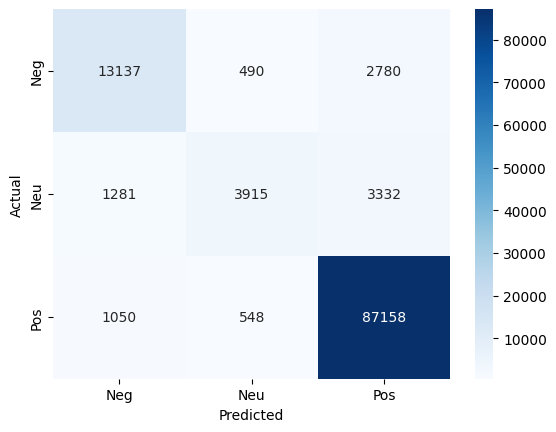

{'logistic_regression': {'accuracy': 0.9166072952124619, 'precision': 0.9113745592436615, 'recall': 0.9166072952124619, 'f1-score': 0.9101319415465912}}


In [10]:
# Step 6: Training and evaluting models
lr_model = LogisticRegression(C=2,max_iter=1000,n_jobs=-1,multi_class="auto")
lr_metrics = evaluate_model(lr_model)
print(lr_metrics)

In [11]:
# Step 7: Inference Function (TRINARY OUTPUT)
def predict_lr(text):
    text_clean = clean_text(text)
    vect = vectorizer.transform([text_clean])
    pred = lr_model.predict(vect)[0]

    if pred == 0:
        return "Negative"
    elif pred == 1:
        return "Neutral"
    else:
        return "Positive"

In [12]:
review = "I hate the taste of this thing."
print("Predicted Sentiment:", predict_lr(review))


Predicted Sentiment: Negative


In [14]:



print("Logistic Regression:", lr_metrics)


Logistic Regression: {'logistic_regression': {'accuracy': 0.9166072952124619, 'precision': 0.9113745592436615, 'recall': 0.9166072952124619, 'f1-score': 0.9101319415465912}}


In [15]:
import json, os

os.makedirs("../models/logistic_regression", exist_ok=True)

with open("../models/logistic_regression/metrice.json", "w") as f:
    json.dump(
        lr_metrics,
        f,
        indent=4
    )

